# Итоговый проект по курсу "Python для анализа данных"

## Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 90)

### 1. Загружаем данные из файла **HR.csv** в датафрейм **hr_df**

In [2]:
hr_df = pd.read_csv('stat_datas/HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,...,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,...,1,0,sales,low
1,0.80,0.86,5,262,...,1,0,sales,medium
2,0.11,0.88,7,272,...,1,0,sales,medium
3,0.72,0.87,5,223,...,1,0,sales,low
4,0.37,0.52,2,159,...,1,0,sales,low


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Выводы:** 
- Датафрейм содержит 10 столбцов и 14999 записей.
- 8 из 10 признаков представлены числовыми значениями, а два - категориальными.
- Идеальный датасет: нет пропущенных значений, типы данных во всех столбцах представлены корректно.

### 2. Рассчитываем основные статистики для переменных

#### Расчет основных статистик для числовых переменных

In [4]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


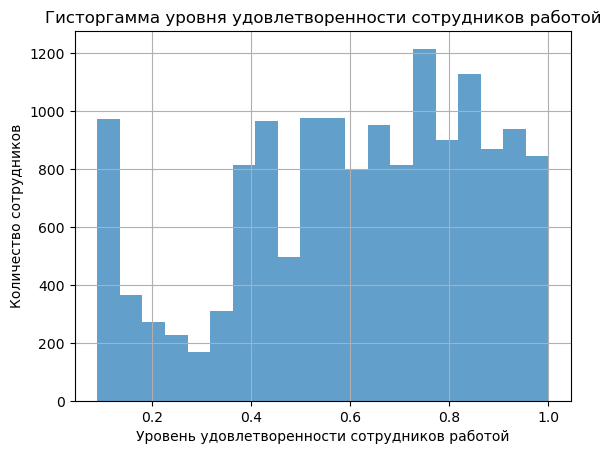

In [5]:
# гистограмма уровня удовлетворенности сотрудников работой
hr_df.satisfaction_level.hist(bins=20, alpha=0.7)
plt.title('Гисторгамма уровня удовлетворенности сотрудников работой')
plt.xlabel('Уровень удовлетворенности сотрудников работой')
plt.ylabel('Количество сотрудников')
plt.show();

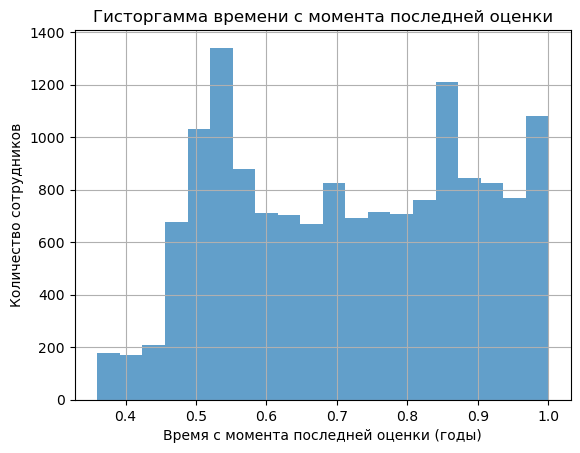

In [6]:
# гистограмма времени с момента последней оценки
hr_df.last_evaluation.hist(bins=20, alpha=0.7)
plt.title('Гисторгамма времени с момента последней оценки')
plt.xlabel('Время с момента последней оценки (годы)')
plt.ylabel('Количество сотрудников')
plt.show();

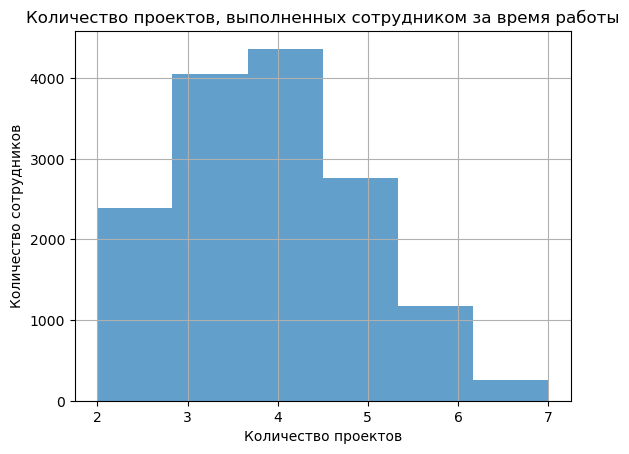

In [7]:
# гистограмма количества проектов, выполненных за время работы
hr_df.number_project.hist(bins=6, alpha=0.7)
plt.title('Количество проектов, выполненных сотрудником за время работы')
plt.xlabel('Количество проектов')
plt.ylabel('Количество сотрудников')
plt.show();

In [8]:
# расчет моды количества проектов, выполненных за время работы
print(f'Большинство сотрудников за время работы на предприятии выполнило {hr_df.number_project.mode()[0]} проекта')

Большинство сотрудников за время работы на предприятии выполнило 4 проекта


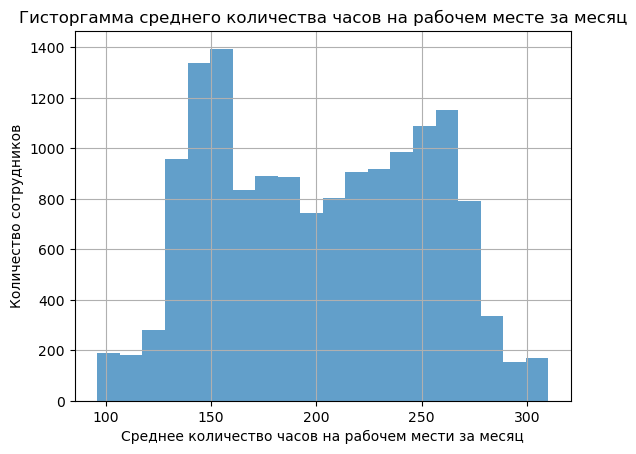

In [9]:
# гистограмма среднего количества часов на рабочем месте за месяц
hr_df.average_montly_hours.hist(bins=20, alpha=0.7)
plt.title('Гисторгамма среднего количества часов на рабочем месте за месяц')
plt.xlabel('Среднее количество часов на рабочем мести за месяц')
plt.ylabel('Количество сотрудников')
plt.show();

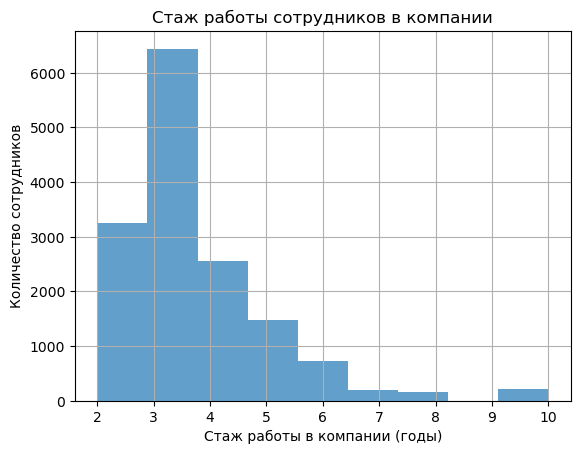

In [10]:
# гистограмма стажа работы сотрудников в компании
hr_df.time_spend_company.hist(bins=9, alpha=0.7)
plt.title('Стаж работы сотрудников в компании')
plt.xlabel('Стаж работы в компании (годы)')
plt.ylabel('Количество сотрудников')
plt.show();

In [11]:
# расчет моды стажа работы сотрудников
print(f'Большинство сотрудников работает на предприятии {hr_df.time_spend_company.mode()[0]} года')

Большинство сотрудников работает на предприятии 3 года


#### Расчет моды для категориальных переменных

In [47]:
# посчитаем количество сотрудников в каждом отделе
hr_df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [13]:
# расчет моды для признака отдел
department_mode = hr_df.department.mode()[0]
print(f'Мода для переменной department = {department_mode}')

Мода для переменной department = sales


In [14]:
# общее количество отделов
len(hr_df.department.value_counts())

10

In [48]:
# посчитаем сколько сотрудников имеют какой относительный уровень зарплаты
hr_df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [16]:
# расчет моды относительного уровня зарплаты
salary_mode = hr_df.salary.mode()[0]
print(f'Мода для переменной salary = {salary_mode}')

Мода для переменной salary = low


**Выводы:**
- Среди восьми переменных, представленных числовыми значениями, три (work_accident, left, promotion_last_5years) являются категориальными бинарными.
- Средние пяти числовых переменных очень близки по значению с медианами этих же переменных, что может указывать на нормальное распределение значений этих переменных.
- Визуальная оценка гистограмм показала, что распределение значений этих признаков не совсем вписывается в кривую Гауса.
- Частота несчастных случаев составляет 14,5%.
- Уволилось 23,8% сотрудников.
- Получили повышение за последние 5 лет всего 2% сотрудников.
- Большинство сотрудников работает на предприятии 3 года.
- Большинство сотрудников за время работы на предприятии выполнили по 4 проекта.
- Наиболшее количество сотрудников работаетв в отделе продаж (sales).
- У большего количества сотрудников низкий относительный кровень заработной платы.

### 3. Расчет и визуализация корреляционной матрицы для количественных переменных. Определение двух самых скоррелированных и двух наименее скоррелированных переменных.

In [28]:
# Выберем из датафрейма только количественные переменные
quant_df = hr_df[['satisfaction_level',
                  'last_evaluation',
                  'number_project',
                  'average_montly_hours',
                  'time_spend_company']]

**Расчет корреляционной матрицы**

In [41]:
corr_df = quant_df.corr()
corr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


В дополнение к параметрическому методу Пирсона рассчитаем корреляционную матрицу по непараметрическому методу Спирмена, так как переменные **number_project** и **time_spend_company** представлены дискретными величинами, которые можно отнести к порядковым.

In [42]:
corr_spearman_df = quant_df.corr(method='spearman')
corr_spearman_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


**С целью визуализации построим тепловую карту корреляционной матрицы**

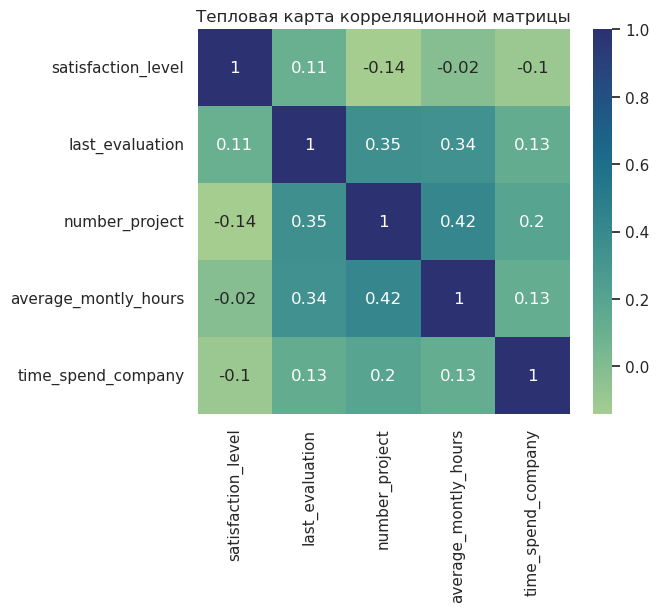

In [36]:
sns.set(rc={'figure.figsize':(6, 5)})
sns.heatmap(corr_df, annot = True, cmap='crest')
plt.title('Тепловая карта корреляционной матрицы');

**Вывод:**
- **Среднее количество часов на рабочем месте** и **количество проектов, выполненных за время работы** являются наиболее скоррелированными переменными (коэффициенты корреляции: Пирсона = 0,42, Спирмана = 0,40).
- **Количество проектов, выполненных за время работы** и **уровень удовлетворенности работой** являются наименее скорелированными переменными (коэффициенты корреляции: Спирмана = 0,005)

### 4. Расчет количества сотрудников в каждом департаменте

Выполним группировку по департаментам и рассчитаем количество работников с учетов уволенных сотрудников

In [69]:
numb_empl = hr_df.loc[hr_df.left != 1]\
    .groupby('department')\
    .count()\
    .sort_values('satisfaction_level', ascending=False)[['satisfaction_level']]
numb_empl.columns = ['numb_empl']
numb_empl

,numb_empl
department,
sales,3126
technical,2023
support,1674
IT,954
product_mng,704
RandD,666
marketing,655
accounting,563
management,539


**Вывод:**
- Наибольшее количество сотрудников работает на момент проведения исследования в отделе продаж.
- Наименьшее - в отделе кадров.

### 5. Распределение сотрудников по зарплатам